In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

In [203]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = pd.merge(test, train, how='inner', on='Id')
test
train

,Id,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,NaN
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,NaN
8689,8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0.0
8690,8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1.0
8691,8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,NaN


In [204]:
columns = ['Transported_x', 'Transported_y']
test = test.drop(columns, axis=1)

In [205]:
train = train[train["Transported"].notnull()]

In [206]:
train.head()

,Id,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0
5,5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1.0


In [207]:
test.head()

,Id,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,304,0337_02,Mars,False,F/63/S,TRAPPIST-1e,19.0,False,417.0,349.0,634.0,3.0,1057.0,Weros Perle
1,2697,2891_01,Earth,False,G/460/S,TRAPPIST-1e,18.0,False,4.0,904.0,0.0,0.0,1.0,Gleney Ortinericey
2,8424,8998_01,Earth,True,G/1449/S,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,Gerry Englence
3,1672,1771_01,Earth,False,G/291/P,TRAPPIST-1e,35.0,False,0.0,338.0,436.0,NaN,0.0,Antone Cardner
4,8458,9034_02,Europa,True,D/288/P,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Errairk Crakete


In [208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 1 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            6954 non-null   int64  
 1   PassengerId   6954 non-null   object 
 2   HomePlanet    6786 non-null   object 
 3   CryoSleep     6777 non-null   object 
 4   Cabin         6796 non-null   object 
 5   Destination   6815 non-null   object 
 6   Age           6806 non-null   float64
 7   VIP           6792 non-null   object 
 8   RoomService   6828 non-null   float64
 9   FoodCourt     6814 non-null   float64
 10  ShoppingMall  6789 non-null   float64
 11  Spa           6820 non-null   float64
 12  VRDeck        6803 non-null   float64
 13  Name          6795 non-null   object 
 14  Transported   6954 non-null   float64
dtypes: float64(7), int64(1), object(7)
memory usage: 869.2+ KB


train.describe().T

# data visualization

# Transported

plt.figure(figsize=(7,7))
train['Transported'].value_counts().plot.pie(explode = [0.05, 0.05] , 
                                             autopct = '%1.1f%%' , 
                                             textprops = {'fontsize' : 16 })
plt.show();

# Age

plt.figure(figsize=(12,7))
sns.histplot(data= train, x= 'Age', hue= 'Transported', binwidth = 1, kde = True)
plt.xlabel('Age')
plt.ylabel('Transported Count')
plt.show();

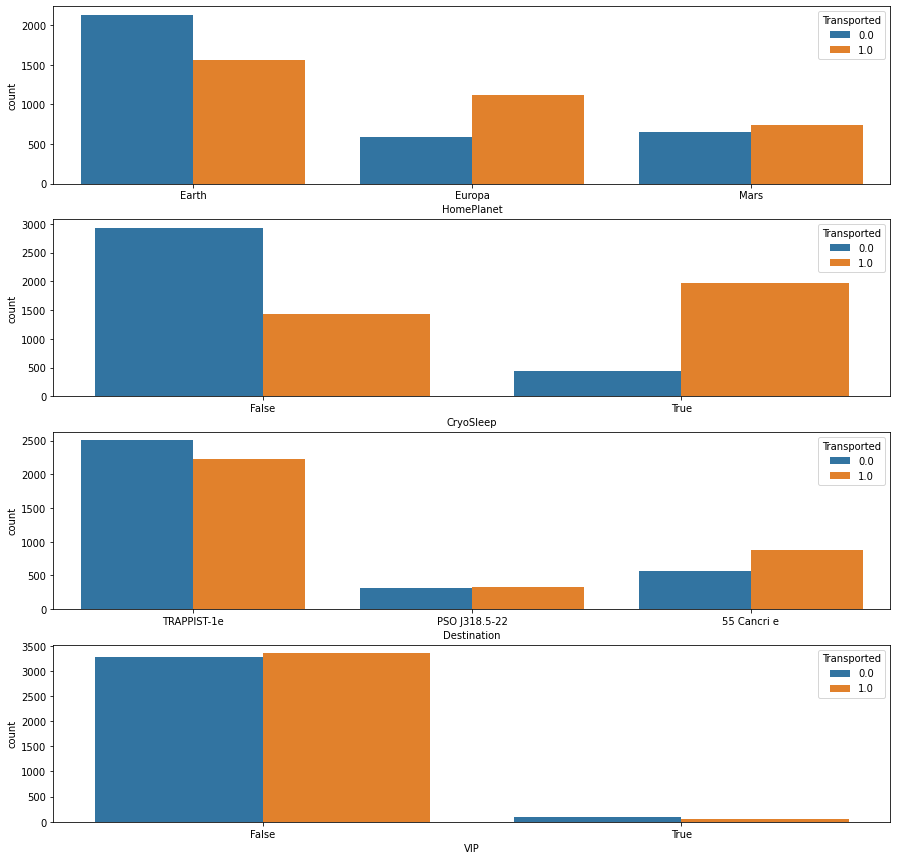

In [209]:
# Categorical

graph_cat = ['HomePlanet' , 'CryoSleep' , 'Destination' , 'VIP']

fig = plt.figure(figsize= (15,15))

for i, name in enumerate(graph_cat):
    
    ax = fig.add_subplot(4, 1, i+1)
    sns.countplot(data= train, axes= ax, x= name, hue= 'Transported')

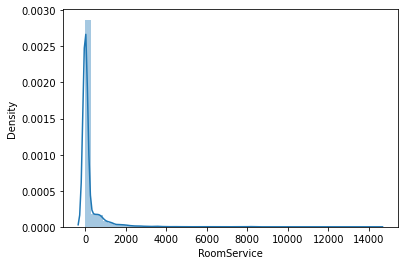

In [210]:
# Numerical 

sns.distplot(train['RoomService']);

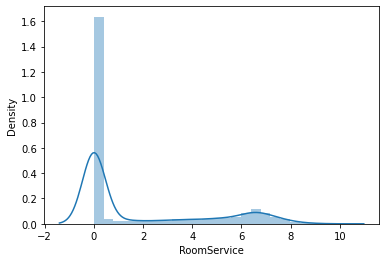

In [211]:
sns.distplot(np.log(train['RoomService']+1));

# missing value

In [212]:
train.isnull().sum()

Id                0
PassengerId       0
HomePlanet      168
CryoSleep       177
Cabin           158
Destination     139
Age             148
VIP             162
RoomService     126
FoodCourt       140
ShoppingMall    165
Spa             134
VRDeck          151
Name            159
Transported       0
dtype: int64

In [213]:
test.isnull().sum()

Id               0
PassengerId      0
HomePlanet      33
CryoSleep       40
Cabin           41
Destination     43
Age             31
VIP             41
RoomService     55
FoodCourt       43
ShoppingMall    43
Spa             49
VRDeck          37
Name            41
dtype: int64

In [214]:
# Age

train_test = [train, test]

for data_age in train_test:
    
    mean = data_age['Age'].mean()
    std = data_age['Age'].std()
    is_null = data_age['Age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age = data_age['Age'].copy()
    age[np.isnan(age)] = rand_age
    data_age['Age'] = age
    data_age['Age'] = data_age['Age'].astype(int)

In [215]:
# Categorical 

for data_obj in train_test:
    
    data_obj['HomePlanet'] = data_obj['HomePlanet'].fillna(data_obj['HomePlanet'].mode()[0])
    data_obj['CryoSleep'] = data_obj['CryoSleep'].fillna(data_obj['CryoSleep'].mode()[0])
    data_obj['Cabin'] = data_obj['Cabin'].fillna(data_obj['Cabin'].mode()[0])
    data_obj['Destination'] = data_obj['Destination'].fillna(data_obj['Destination'].mode()[0])
    data_obj['VIP'] = data_obj['VIP'].fillna(data_obj['VIP'].mode()[0])

train.isnull().sum()

In [216]:
# Numerical 

for data_num in train_test:
    
    data_num['RoomService'] = np.log(data_num['Spa']+1) 
    data_num['ShoppingMall'] = np.log(data_num['ShoppingMall']+1) 
    data_num['Spa'] = np.log(data_num['Spa']+1) 
    data_num['VRDeck'] = np.log(data_num['VRDeck']+1) 
    data_num['FoodCourt'] = np.log(data_num['FoodCourt']+1) 

    data_num['RoomService'] = data_num['RoomService'].fillna(data_num['RoomService'].median())
    data_num['ShoppingMall'] = data_num['ShoppingMall'].fillna(data_num['ShoppingMall'].median())
    data_num['Spa'] = data_num['Spa'].fillna(data_num['Spa'].median())
    data_num['VRDeck'] = data_num['VRDeck'].fillna(data_num['VRDeck'].median())
    data_num['FoodCourt'] = data_num['FoodCourt'].fillna(data_num['FoodCourt'].median())

train.isnull().sum()

In [217]:
# Drop Name

for data_name in train_test:
    data_name.drop('Name', axis=1, inplace=True)

train.isnull().sum()

In [218]:
# Label Encoding 

for data in train_test:
    
    data['HomePlanet'] =data['HomePlanet'].astype('category').cat.codes
    data['Destination'] =data['Destination'].astype('category').cat.codes

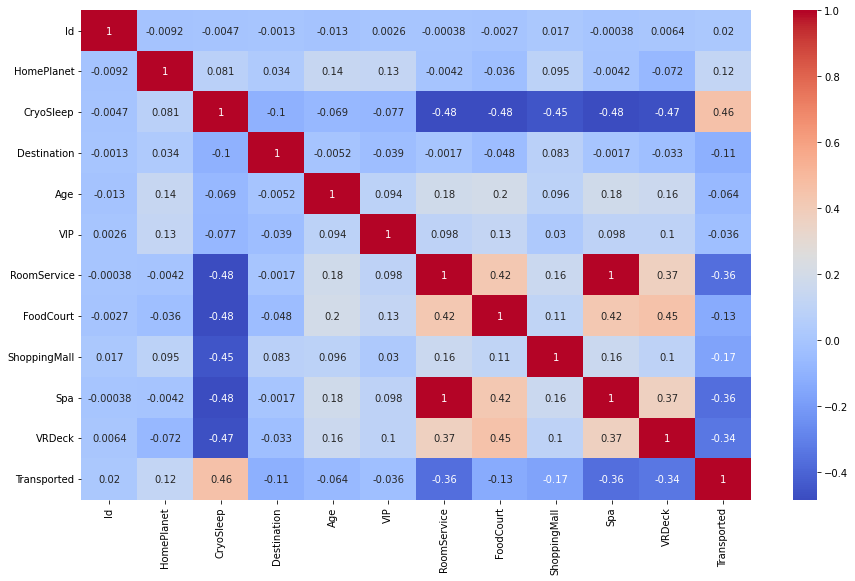

In [219]:
# Corr Matrix

corr = train.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot= True, cmap= 'coolwarm');

In [220]:
# Data cleaning for model

train = train.drop('Cabin', axis= 1)
test = test.drop('Cabin', axis= 1)

# model

In [221]:
X = train.drop('Transported', axis=1)
y = train['Transported']
X_test = test 

In [222]:
X.head()

,Id,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
1,1,0002_01,0,False,2,24,False,6.309918,2.302585,3.258097,6.309918,3.806662
2,2,0003_01,1,False,2,58,True,8.812248,8.182280,0.000000,8.812248,3.912023
3,3,0003_02,1,False,2,33,False,8.110728,7.157735,5.918894,8.110728,5.267858
4,4,0004_01,0,False,2,16,False,6.338594,4.262680,5.023881,6.338594,1.098612
5,5,0005_01,0,False,1,44,False,5.676754,6.182085,0.000000,5.676754,0.000000


In [229]:
y.head()
y.shape

(6954,)

In [224]:
X_test.head()
X_test.drop('Id', axis=1, inplace=True)
X_test.drop('PassengerId', axis=1, inplace=True)

from sklearn.model_selection import train_test_split, cross_val_score

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
def classify(model, xx, yy):
    
    x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state= 42)
    model.fit(x_train, y_train)
    print('Accuracy: ', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score: ', np.mean(score))

In [226]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
classify(model, X, y)

Accuracy:  0.5485262401150252
CV Score:  0.45801529876027286


X_test

In [227]:
# model_rf = RandomForestClassifier(max_depth=12, min_samples_leaf=12, min_samples_split=8, n_estimators=50)
# model_rf.fit(x_train, y_train)

y_pred = model.predict(X_test)
# print(model.score(x_test, y_test))

y_submission = model.predict(X_test) 

ValueError: X has 10 features, but KNeighborsClassifier is expecting 12 features as input.

In [ ]:
submission = pd.DataFrame({
        "Id": pd.read_csv('test.csv')["Id"],
        "Transported": y_submission
    })

In [ ]:
submission["Transported"] = submission["Transported"].astype(int)

In [ ]:
submission.to_csv('submission.csv', index=False)

# Now try other models
# Or tune your parameters

## Try Decision Tree
## Try Other models
## Try other parameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier





In [ ]:
import numpy as np 
np.__config__.show() 